In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import dataset
baseballcsv = pd.read_csv('2002-2022 MLB Hitting Data.csv')


In [3]:
# drop player_id column (many blanks) and first and last name columns
baseballcsvdropid = baseballcsv.drop(baseballcsv.columns[[0, 1, 2, 3]], axis=1)


In [4]:
# drop any rows with a blank value in it
baseballfinal = baseballcsvdropid.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
baseballfinal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4257 entries, 2223 to 11447
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_age           4257 non-null   int64  
 1   b_ab                 4257 non-null   int64  
 2   b_total_hits         4257 non-null   int64  
 3   b_single             4257 non-null   int64  
 4   b_double             4257 non-null   int64  
 5   b_triple             4257 non-null   int64  
 6   b_home_run           4257 non-null   int64  
 7   b_strikeout          4257 non-null   int64  
 8   b_walk               4257 non-null   int64  
 9   batting_avg          4257 non-null   float64
 10  slg_percent          4257 non-null   float64
 11  on_base_percent      4257 non-null   float64
 12  b_rbi                4257 non-null   int64  
 13  r_total_stolen_base  4257 non-null   int64  
 14  b_swinging_strike    4257 non-null   int64  
 15  xba                  4257 non-null

In [5]:
# homerun percentiles
fiftyper = np.percentile(baseballfinal['b_home_run'], 50)
eightyper= np.percentile(baseballfinal['b_home_run'], 80)


In [6]:
# add a categorical homerun column
def home_run_cat(value):
    if value < fiftyper:
        return "Low"
    if fiftyper <= value < eightyper:
        return "Medium"
    elif eightyper <= value < 400:
        return "High"
baseballfinal.copy()
baseballfinal['homeruncat'] = baseballfinal['b_home_run'].map(home_run_cat)

<ipython-input-6-33381a02475f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseballfinal['homeruncat'] = baseballfinal['b_home_run'].map(home_run_cat)


In [7]:
# summary statistics

baseballfinal.describe().T

,count,mean,std,min,25%,50%,75%,max
player_age,4257.0,28.031947,3.763873,19.000,25.000,28.000,31.000,43.000
b_ab,4257.0,276.637538,178.902220,36.000,115.000,235.000,429.000,681.000
b_total_hits,4257.0,69.944797,50.922048,0.000,25.000,56.000,110.000,216.000
b_single,4257.0,44.792577,33.023068,0.000,17.000,36.000,69.000,170.000
b_double,4257.0,13.941273,10.923621,0.000,5.000,11.000,22.000,58.000
b_triple,4257.0,1.341555,1.816110,0.000,0.000,1.000,2.000,15.000
b_home_run,4257.0,9.869392,9.779853,0.000,2.000,7.000,14.000,62.000
b_strikeout,4257.0,66.975335,42.247415,3.000,31.000,58.000,97.000,219.000
b_walk,4257.0,26.122622,21.804594,0.000,9.000,20.000,38.000,145.000
batting_avg,4257.0,0.236554,0.049018,0.000,0.211,0.244,0.269,0.400


In [8]:
# train and test data
X = baseballfinal.drop(['b_home_run','homeruncat'], axis=1)
y = baseballfinal['homeruncat']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train.shape, X_test.shape

((2852, 24), (1405, 24))

In [9]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators = 200,random_state=0)


In [10]:
# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score (all variables included)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 200 decision-trees : {0:.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 200 decision-trees : 0.8904


In [11]:
# find most important features for the best model

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# table of features by importance

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

b_rbi                  0.166245
b_swinging_strike      0.111011
slg_percent            0.076734
b_ab                   0.075968
b_walk                 0.069747
xiso                   0.066904
b_strikeout            0.066867
b_total_hits           0.058355
xslg                   0.046665
barrel_batted_rate     0.044856
b_double               0.036760
xwoba                  0.026946
b_single               0.026080
launch_angle_avg       0.017849
batting_avg            0.015506
xba                    0.013722
bacon                  0.013152
exit_velocity_avg      0.012713
on_base_percent        0.011729
sprint_speed           0.010528
xobp                   0.010311
player_age             0.007988
r_total_stolen_base    0.007604
b_triple               0.005763
dtype: float64

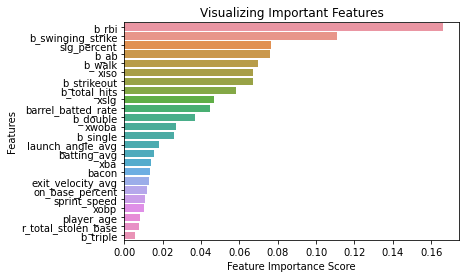

In [13]:
# Graph the most importance features

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [20]:
# confusion matrix to assess model performance (false positives, false negatives)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 62 166  88]
 [117 306 231]
 [ 87 203 145]]


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.23      0.20      0.21       316
         Low       0.45      0.47      0.46       654
      Medium       0.31      0.33      0.32       435

    accuracy                           0.37      1405
   macro avg       0.33      0.33      0.33      1405
weighted avg       0.36      0.37      0.36      1405



# Random Forest Attempt 2

In [22]:
# drop unimportant features
# declare feature vector and target variable

x2 = baseballfinal.drop(baseballfinal.columns.difference(['b_rbi','b_swinging_strike','sig_percent','b_walk']), axis = 1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 40)

In [24]:
clff = RandomForestClassifier(random_state=0)

# fit the model to the training set

clff.fit(X_train, y_train)

# Predict on the test set results

y_pred2 = clff.predict(X_test)

# Check accuracy score 

print('Model accuracy score with insignificant variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with insignificant variables removed : 0.8100


In [25]:
# confusion matrix to assess model performance (false positives, false negatives)

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)

print('Confusion matrix\n\n', cm2)

Confusion matrix

 [[253   1  62]
 [  0 580  74]
 [ 55  75 305]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

        High       0.82      0.80      0.81       316
         Low       0.88      0.89      0.89       654
      Medium       0.69      0.70      0.70       435

    accuracy                           0.81      1405
   macro avg       0.80      0.80      0.80      1405
weighted avg       0.81      0.81      0.81      1405



# Random Forest Attempt 3

In [28]:
# model with manually-selected variables

x3 = baseballfinal.drop(baseballfinal.columns.difference(['xiso','b_swinging_strike','xslg','barrel_batted_rate','bacon','launch_angle_average','exit_velocity_average']), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size = 0.33, random_state = 30)
clfff = RandomForestClassifier(random_state=0)

# fit the model to the training set

clfff.fit(X_train, y_train)

# Predict on the test set results

y_pred3 = clfff.predict(X_test)

# Check accuracy score 

print('Model accuracy score with insignificant variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

Model accuracy score with insignificant variables removed : 0.8114


In [29]:
feature_scores3 = pd.Series(clfff.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores3

b_swinging_strike     0.421328
xslg                  0.221047
xiso                  0.176466
barrel_batted_rate    0.098691
bacon                 0.082468
dtype: float64

In [30]:
cm3 = confusion_matrix(y_test, y_pred3)

print('Confusion matrix\n\n', cm3)

Confusion matrix

 [[239   1  60]
 [  0 608  78]
 [ 45  81 293]]


In [31]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

        High       0.84      0.80      0.82       300
         Low       0.88      0.89      0.88       686
      Medium       0.68      0.70      0.69       419

    accuracy                           0.81      1405
   macro avg       0.80      0.79      0.80      1405
weighted avg       0.81      0.81      0.81      1405

